# AUTMI Seminar 2019/2020 Spring

## Natural Language Processing

## April , 2020

# Text representations and analysis

## Preparation

[Download GLOVE](https://nlp.stanford.edu/projects/glove/)

## Representations

For humans meaningful representation are strings, but the computer needs numerical representations to be able to run machine learning algorithms. The easiest approach is to create a `word ---> id` mapping that is going to map words to integer ids starting from 0. Different words should have a different id.

This is called **one-hot encoding**. Let's encode the following sentence:

In [ ]:
sentence = "yesterday the lazy dog went to the store to buy food".split(" ")
print(sentence)

In [ ]:
mapping = dict()
max_id = 0

for word in sentence:
    # a word we have not seen before
    if word not in mapping:
        # assign the smallest unused id
        mapping[word] = max_id
        # increment the id for the next word
        max_id = max_id + 1
        
mapping

## Problems
- When representing words with id's we assign them to the words in the order of the encounter. 
- This means that we will assign different vectors to the words each time we run the algorithm.
- We also have no concept of similarity, intuitively: `similarity(cat, dog) > similarity(cat, computer)`
- The representation is very sparse and could have very high dimension, which would also slow the computations.

## Word embeddings

- map each word to a small dimensional (around 100-300) continuous vectors.
- this means that similar words should have similar vectors.
    - what do we mean by word similarity ?
    
    
### Cosine similarity

- Now that we have word vectors, we need a way to quantify the similarity between individual words, according to these vectors. One such metric is cosine-similarity. We will be using this to find words that are "close" and "far" from one another.

$$s = \frac{p \cdot q}{||p|| ||q||}, \textrm{ where } s \in [-1, 1] $$ 

    
### Creating word embeddings

"a word is characterized by the company it keeps" -- popularized by Firth

- A popular theory is that words are as similar as their context is
- Word embeddings are also created with neural networks
    1. predict a missing word based on its context
    2. predict a word's context given the word itself

### Most famous embeddings for English

- Word2vec
- GLOVE

Both have various versions, we will use a GLOVE embedding of 100 dimensional vectors trained on 6B tokens.

[Download GLOVE](https://nlp.stanford.edu/projects/glove/)

In [994]:
# The sentence objects holds a sentence that we may want to embed or tag
from flair.data import Sentence
from flair.embeddings import FlairEmbeddings

# init embedding
flair_embedding_forward = FlairEmbeddings('news-forward')

# create a sentence
sentence = Sentence('The grass is green .')

# embed words in sentence
embeddings = flair_embedding_forward.embed(sentence)


IndexError: list index out of range

In [996]:
# your text of many sentences
text = " so what's your budget for two thousand twenty fourteen thousand dollars i see and when do you plan to implement the product in in april okay that's perfect to want to we planned for a april and can we sign the contract in may yes please. yeah that's what i'm trying to find out do you have that information for me you know okay"

# use a library to split into sentences
from segtok.segmenter import split_single

sentences = [Sentence(sent, use_tokenizer=True) for sent in split_single(text)]
print(sentences)

[Sentence: "so what 's your budget for two thousand twenty fourteen thousand dollars i see and when do you plan to implement the product in in april okay that 's perfect to want to we planned for a april and can we sign the contract in may yes please ." - 49 Tokens, Sentence: "yeah that 's what i 'm trying to find out do you have that information for me you know okay" - 20 Tokens]


In [901]:
import gensim

embedding_file = "glove.6B.100d.txt"

embedding = gensim.models.KeyedVectors.load_word2vec_format(embedding_file, binary=False)

In [ ]:
dog_vector = embedding["dog"]
type(dog_vector), dog_vector.shape

In [ ]:
embedding.most_similar("president")

In [ ]:
embedding.most_similar(positive=['woman', 'king'], negative=['man'])

In [ ]:
embedding.similarity("woman", "computer")

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
def tsne_plot(model, size=500):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    for word in model.wv.vocab:
        if len(tokens) > size:
            break
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
tsne_plot(embedding, 200)

In [902]:
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (16, 10)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'
matplotlib.pyplot.rcParams['font.size'] = 20

import spacy
from spacy import displacy

import os

import pandas as pd

import spacy
import pandas as pd
import re

In [903]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/userhome/student/adaamko/miniconda3/lib/python3.7/site-packages/en_core_web_sm
-->
/userhome/student/adaamko/miniconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [904]:
nlp = spacy.load("en")

## Data analyzation

- we use nlp frameworks for the basic tasks
- for the preprocessing tasks (lemmatization, tokenization) we use [spaCy](https://spacy.io/)
- for keyword extraction and various text analyzation tasks we use [textacy](https://github.com/chartbeat-labs/textacy)
- textacy builds on spaCy output
- both are open source ython libraries

In [ ]:
import torch
import torchtext
from torchtext import data
from torchtext.datasets import text_classification
import os
if not os.path.isdir('./data'):
    os.mkdir('./data')
text_classification.DATASETS['AG_NEWS'](
    root='./data', ngrams=NGRAMS, vocab=None)

In [ ]:
import pandas as pd

train_data = pd.read_csv("./data/ag_news_csv/train.csv",quotechar='"', names=['label', 'title', 'description'])
test_data = pd.read_csv("./data/ag_news_csv/test.csv",quotechar='"', names=['label', 'title', 'description'])

In [ ]:
train_data["text"] = train_data.title +  "," + train_data.description
train_data = train_data.drop("title", axis=1)
train_data = train_data.drop("description", axis=1)

test_data["text"] = test_data.title +  "," + test_data.description
test_data = test_data.drop("title", axis=1)
test_data = test_data.drop("description", axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe2ed9ffd0>],
      dtype=object)

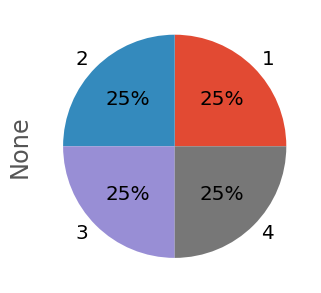

In [975]:
train_data.groupby(train_data.label).size().plot.pie(subplots=True,figsize=(5, 10),autopct="%.0lf%%")

In [ ]:
doc = nlp("Donald Trump called and asked me to serve as his running mate and Vice Presidential nominee.")

In [ ]:
for tok in doc:
    print(tok.pos_)

In [ ]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 100})
displacy.render(doc, style='ent', jupyter=True)

In [913]:
text_sports = train_data[train_data.label == 2]

text = " ".join(text_sports.text.tolist())
doc_text = nlp(text[:1000000])

In [914]:
import textacy
from textacy.extract import ngrams
from collections import Counter

Counter([ng.text.lower() for n in [2,4] for ng in ngrams(doc_text, n)]).most_common(10)

[('gold medal', 384),
 ('new york', 243),
 ('united states', 234),
 ('athens olympics', 121),
 ('red sox', 119),
 ('olympic games', 114),
 ('olympic gold', 110),
 ('ryder cup', 102),
 ('sports network', 102),
 ('paul hamm', 86)]

Textacy can use graph based keyword extraction methods.

* TextRank (focuses on words)
* SingleRank (focueses on phrases)
* [SGRank](http://www.aclweb.org/anthology/S15-1013)

In [916]:
from textacy import keyterms

keyterms.textrank(
    doc_text,
    normalize = "lemma",
    n_keyterms=10,
)

[('AP),AP', 0.0055519957775050244),
 ('ATHENS', 0.0042262513450477355),
 ('olympic', 0.0042167489415089006),
 ('night', 0.003950307258474872),
 ('team', 0.003912641706514775),
 ('gold', 0.0038847526698520553),
 ('Olympics', 0.003518805681814526),
 ('year', 0.0035067900688865797),
 ('game', 0.0034290486710939635),
 ('Athens', 0.0033117943012753843)]

In [ ]:
textacy.keyterms.singlerank(
    doc_text,
    normalize = "lemma",
    n_keyterms=10,
)

In [ ]:
textacy.keyterms.sgrank(
    doc_text, 
    normalize="lemma",
    ngrams = (2,3,4,5,6),
    n_keyterms=15,
)

Extract entities from the doc:

In [ ]:
import math
from collections import Counter 
words = [tok for tok in doc_text if tok.is_alpha and not tok.is_stop]
word_probs = {tok.text.lower(): tok.prob for tok in words}

freqs = Counter(tok.text for tok in words)

In [ ]:
from wordcloud import WordCloud
print(len(freqs))
wordcloud = WordCloud(background_color="white", max_words=30, scale=1.5).generate_from_frequencies(freqs)
image = wordcloud.to_image()
image.save("./wordcloud.png")

In [ ]:
from IPython.display import Image 
Image(filename='./wordcloud.png')

In [925]:
sample_df = train_data.groupby('label').apply(lambda x: x.sample(frac=0.2))

1

We add a new column to the table which will contain the cleaned and preprocessed text

In [ ]:
from tqdm import tqdm

clean_text = []
for text in tqdm(sample_df['text']):
    doc = nlp(text)
    words = []
    for tok in doc:
        if not tok.is_stop and tok.is_alpha:
            words.append(tok.lemma_)
    clean_text.append(words)

# Add cleaned text to dataframe
sample_df['clean_text'] = clean_text
sample_df.head()

In [979]:
# Set variables for dependent and independent variables
labels = sample_df.label.tolist()
data = sample_df['clean_text'].tolist()

6000

In [931]:
import gensim
from tqdm import tqdm
from sklearn.model_selection import train_test_split as split
import numpy as np

In [966]:
# We use the pretrained glove embedding
# To handle the Seq2Vec method, we take the mean of the word-vectors
def vectorize(tr_data, tst_data):
    print('\nLoading existing glove model...')
    embedding_file = "glove.6B.100d.txt"

    model = gensim.models.KeyedVectors.load_word2vec_format(embedding_file, binary=False)
    vectorizer = model.wv
    vocab_length = len(model.wv.vocab)
    
    tr_vectors = [
        np.array(np.mean([vectorizer[word] if word in model else np.zeros((100,)) for word in article], axis=0)) for article in tqdm(tr_data,'Vectorizing')
    ]
    
    tst_vectors = [
        np.array(np.mean([vectorizer[word] if word in model else np.zeros((100,)) for word in article], axis=0)) for article in tqdm(tst_data,'Vectorizing')
    ]
    
    return tr_vectors, tst_vectors

In [967]:
def get_features_and_labels(data, labels):
    tr_data,tst_data,tr_labels,tst_labels = split(data,labels,test_size=0.3)
    
    tst_vecs = []
    tr_vecs = []
    tr_vecs, tst_vecs = vectorize(tr_data, tst_data)    
    return tr_vecs, tr_labels, tst_vecs, tst_labels

In [968]:
tr_vecs, tr_labels, tst_vecs, tst_labels = get_features_and_labels(data, labels)


Loading existing glove model...


/userhome/student/adaamko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/userhome/student/adaamko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


Vectorizing:   0%|          | 0/16800 [00:00<?, ?it/s]

Vectorizing:  10%|█         | 1740/16800 [00:00<00:00, 17395.12it/s]

Vectorizing:  21%|██        | 3458/16800 [00:00<00:00, 17327.70it/s]

Vectorizing:  31%|███       | 5198/16800 [00:00<00:00, 17347.98it/s]

Vectorizing:  41%|████▏     | 6962/16800 [00:00<00:00, 17433.35it/s]

Vectorizing:  52%|█████▏    | 8711/16800 [00:00<00:00, 17447.79it/s]

Vectorizing:  62%|██████▏   | 10442/16800 [00:00<00:00, 17405.04it/s]

Vectorizing:  73%|███████▎  | 12201/16800 [00:00<00:00, 17458.24it/s]

Vectorizing:  83%|████████▎ | 13965/16

In [969]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

### You can try different classifiers as well
- Multiple are available from [scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [970]:
rf  =  RandomForestClassifier(n_estimators=100, verbose=True, n_jobs=-1)
svc = SVC()
lr  = LogisticRegression(n_jobs=-1)

In [972]:
rf.fit(tr_vecs, tr_labels)
svc.fit(tr_vecs, tr_labels)
lr.fit(tr_vecs, tr_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
/userhome/student/adaamko/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/userhome/student/adaamko/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/userhome/student/adaamko/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [981]:
from sklearn.metrics import accuracy_score
print(type(tst_vecs))
rf_pred = rf.predict(tst_vecs)
svc_pred = svc.predict(tst_vecs)
lr_pred = lr.predict(tst_vecs)
print("Random Forest Test accuracy : {}".format(accuracy_score(tst_labels, rf_pred)))
print("SVC Test accuracy : {}".format(accuracy_score(tst_labels, svc_pred)))
print("Logistic Regression Test accuracy : {}".format(accuracy_score(tst_labels, lr_pred)))

<class 'list'>


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Random Forest Test accuracy : 0.8320833333333333
SVC Test accuracy : 0.8391666666666666
Logistic Regression Test accuracy : 0.8426388888888889


In [982]:
tr_data,tst_data,tr_labels,tst_labels = split(data,labels,test_size=0.3)

with open("train.txt", "w+") as f:
    for sample, label in zip(tr_data, tr_labels):
        f.write(" ".join(sample) + "\t" + str(label) + "\n")
        
with open("dev.txt", "w+") as f:
    for sample, label in zip(tst_data, tst_labels):
        f.write(" ".join(sample) + "\t" + str(label) + "\n")

# Building a Deep Learning model with pytorch and torchtext

In [251]:
test_data.to_csv("dataset_test.csv", index=False)
train_data.to_csv("dataset_train.csv", index=False)

In [846]:
SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize = 'spacy')
LABEL = data.LabelField(dtype = torch.long)

In [847]:
fields = [('label',LABEL),('text', TEXT)]

train, test = data.TabularDataset.splits(
                                        path = '.',
                                        train = 'dataset_train.csv',
                                        test = 'dataset_test.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True
)

In [848]:
print(vars(train.examples[0]))

{'label': '3', 'text': ['Wall', 'St.', 'Bears', 'Claw', 'Back', 'Into', 'the', 'Black', '(', 'Reuters),Reuters', '-', 'Short', '-', 'sellers', ',', 'Wall', 'Street', "'s", 'dwindling\\band', 'of', 'ultra', '-', 'cynics', ',', 'are', 'seeing', 'green', 'again', '.']}


In [849]:
import random

train, valid = train.split(random_state = random.seed(SEED))

In [850]:
print(f'Number of training examples: {len(train)}')
print(f'Number of validation examples: {len(valid)}')
print(f'Number of testing examples: {len(test)}')

Number of training examples: 84000
Number of validation examples: 36000
Number of testing examples: 7600


In [851]:
TEXT.build_vocab(train, vectors ="glove.6B.100d")  
LABEL.build_vocab(train)

In [852]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [853]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits((train, valid, test), batch_size = BATCH_SIZE,
                                                                           sort_key = lambda x: len(x.text),
                                                                           sort_within_batch = False,
                                                                           device = device)

In [854]:
import torch.nn as nn
from torch import autograd

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.embedding.weight.data.copy_(TEXT.vocab.vectors)
        self.embedding.weight.requires_grad=False
        
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        
        self.fc = nn.Linear(hidden_dim, output_dim)

        
    def forward(self, text):

        #text = [sent len, batch size]
        
        embedded = self.embedding(text)
        
        #embedded = [sent len, batch size, emb dim]
        
        output, hidden = self.lstm(embedded)
        
        #output = [sent len, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
                
        y = self.fc(hidden[-1])
        
        log_probs = F.log_softmax(y.squeeze(0))
        return log_probs

In [855]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 100
OUTPUT_DIM = 4

model = LSTMClassifier(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [856]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [857]:
criterion = nn.NLLLoss()

In [858]:
model = model.to(device)
criterion = criterion.to(device)

In [897]:
from sklearn.metrics import classification_report
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    #round predictions to the closest integer
    rounded_preds = preds.argmax(1)
    correct = (rounded_preds == y).float() #convert into float for division 
    target_names = ['class 0', 'class 1', 'class 2', 'class 3']
    print(classification_report(rounded_preds.cpu().numpy(), y.cpu().numpy(), target_names=target_names))
    acc = correct.sum() / len(correct)
    return acc

In [887]:
from sklearn.metrics import accuracy_score
import torch.nn.functional as F
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
                
        predictions = model(batch.text)

        loss = criterion(predictions, batch.label)
        
        acc = binary_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [888]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:
            predictions = model(batch.text)
            loss = criterion(predictions, batch.label)
            
            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [889]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [874]:
N_EPOCHS = 15

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

/userhome/student/adaamko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 01 | Epoch Time: 0m 7s
	Train Loss: 0.426 | Train Acc: 85.65%
	 Val. Loss: 0.577 |  Val. Acc: 77.96%
Epoch: 02 | Epoch Time: 0m 7s
	Train Loss: 0.385 | Train Acc: 86.58%
	 Val. Loss: 0.505 |  Val. Acc: 82.42%
Epoch: 03 | Epoch Time: 0m 7s
	Train Loss: 0.359 | Train Acc: 87.44%
	 Val. Loss: 0.496 |  Val. Acc: 81.07%
Epoch: 04 | Epoch Time: 0m 7s
	Train Loss: 0.339 | Train Acc: 88.11%
	 Val. Loss: 0.456 |  Val. Acc: 84.37%
Epoch: 05 | Epoch Time: 0m 7s
	Train Loss: 0.321 | Train Acc: 88.71%
	 Val. Loss: 0.488 |  Val. Acc: 82.33%
Epoch: 06 | Epoch Time: 0m 7s
	Train Loss: 0.304 | Train Acc: 89.31%
	 Val. Loss: 0.441 |  Val. Acc: 83.48%
Epoch: 07 | Epoch Time: 0m 7s
	Train Loss: 0.289 | Train Acc: 89.83%
	 Val. Loss: 0.422 |  Val. Acc: 85.32%
Epoch: 08 | Epoch Time: 0m 7s
	Train Loss: 0.275 | Train Acc: 90.34%
	 Val. Loss: 0.400 |  Val. Acc: 85.52%
Epoch: 09 | Epoch Time: 0m 7s
	Train Loss: 0.262 | Train Acc: 90.84%
	 Val. Loss: 0.411 |  Val. Acc: 85.39%
Epoch: 10 | Epoch Time: 0m 7

In [898]:
model.load_state_dict(torch.load('tut1-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

/userhome/student/adaamko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


              precision    recall  f1-score   support

     class 0       1.00      0.25      0.40         4
     class 1       0.62      0.67      0.64        12
     class 2       0.76      0.80      0.78        35
     class 3       0.62      0.62      0.62        13

    accuracy                           0.70        64
   macro avg       0.75      0.58      0.61        64
weighted avg       0.72      0.70      0.70        64

              precision    recall  f1-score   support

     class 0       1.00      0.89      0.94         9
     class 1       0.84      0.89      0.86        18
     class 2       0.86      0.83      0.84        29
     class 3       0.56      0.62      0.59         8

    accuracy                           0.83        64
   macro avg       0.81      0.81      0.81        64
weighted avg       0.84      0.83      0.83        64

              precision    recall  f1-score   support

     class 0       1.00      0.70      0.82        10
     class 1       0.

              precision    recall  f1-score   support

     class 0       0.85      0.89      0.87        19
     class 1       0.88      1.00      0.93        14
     class 2       0.94      0.71      0.81        24
     class 3       0.60      0.86      0.71         7

    accuracy                           0.84        64
   macro avg       0.82      0.87      0.83        64
weighted avg       0.86      0.84      0.84        64

              precision    recall  f1-score   support

     class 0       0.91      0.83      0.87        24
     class 1       0.88      0.78      0.82         9
     class 2       0.87      0.93      0.90        14
     class 3       0.79      0.88      0.83        17

    accuracy                           0.86        64
   macro avg       0.86      0.86      0.86        64
weighted avg       0.86      0.86      0.86        64

              precision    recall  f1-score   support

     class 0       0.94      0.94      0.94        18
     class 1       0.

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        13
     class 1       0.94      1.00      0.97        17
     class 2       0.89      0.89      0.89        18
     class 3       0.87      0.81      0.84        16

    accuracy                           0.92        64
   macro avg       0.92      0.93      0.92        64
weighted avg       0.92      0.92      0.92        64

              precision    recall  f1-score   support

     class 0       0.93      1.00      0.96        13
     class 1       0.86      0.92      0.89        13
     class 2       0.81      0.85      0.83        20
     class 3       0.87      0.72      0.79        18

    accuracy                           0.86        64
   macro avg       0.87      0.87      0.87        64
weighted avg       0.86      0.86      0.86        64

              precision    recall  f1-score   support

     class 0       1.00      0.88      0.94        17
     class 1       0.

# Building a Deep Learning model with AllenNLP

- AllenNLP is a research library built on PyTorch
- makes it easy to use state-of-the-art models
- easy to generalize

In [983]:
from allennlp.data.fields import LabelField, TextField
from allennlp.data.token_indexers import SingleIdTokenIndexer
from allennlp.data.tokenizers import WordTokenizer
from allennlp.models import Model
from allennlp.modules import Embedding, Seq2VecEncoder, TextFieldEmbedder
from allennlp.modules.text_field_embedders import BasicTextFieldEmbedder
from allennlp.modules.seq2vec_encoders import BagOfEmbeddingsEncoder

from typing import Dict

import numpy as np
import torch
import torch.optim as optim

from allennlp.data.iterators import BucketIterator, BasicIterator
from allennlp.data.vocabulary import Vocabulary
from allennlp.models import Model
from allennlp.modules.seq2vec_encoders import Seq2VecEncoder, PytorchSeq2VecWrapper
from allennlp.modules.text_field_embedders import TextFieldEmbedder, BasicTextFieldEmbedder
from allennlp.modules.token_embedders import Embedding
from allennlp.nn.util import get_text_field_mask
from allennlp.training.metrics import CategoricalAccuracy, F1Measure
from allennlp.training.trainer import Trainer

from allennlp.data import DatasetReader, Instance, Vocabulary
from allennlp.data.tokenizers.word_splitter import SpacyWordSplitter
from allennlp.predictors import Predictor
from overrides import overrides
from typing import Dict, Union, Iterable, Iterator, List, Optional, Tuple, Deque
from allennlp.common import JsonDict


In [984]:
@DatasetReader.register('classification_simple2')
class ClassificationReader(DatasetReader):
    def __init__(self):
        super().__init__(lazy=False)
        self.tokenizer = WordTokenizer()
        self.token_indexers = {'tokens': SingleIdTokenIndexer()}

    def _read(self, file_path: str) -> Iterable[Instance]:
        with open(file_path, 'r') as lines:
            for line in lines:
                text, label = line.strip().split('\t')
                text_field = TextField(self.tokenizer.tokenize(text),
                                       self.token_indexers)
                label_field = LabelField(label)
                fields = {'text': text_field, 'label': label_field}
                yield Instance(fields)
                
    def text_to_instance(self, text_list):
        text_field = TextField(self.tokenizer.tokenize(" ".join(text_list)), self.token_indexers)
        fields = {'text': text_field}
        return Instance(fields)
        

In [985]:
@Model.register("lstm_classifier_simple")
class LstmClassifier(Model):
    def __init__(self,
                 word_embeddings: TextFieldEmbedder,
                 encoder: Seq2VecEncoder,
                 vocab: Vocabulary) -> None:
        super().__init__(vocab)
        # Embeddings convert words to their vector representations
        self.word_embeddings = word_embeddings

        self.encoder = encoder

        # The fully-connected linear layer extracts the features from the vector
        self.linear = torch.nn.Linear(in_features=encoder.get_output_dim(),
                                      out_features=vocab.get_vocab_size('labels'))

        # Define the metrics
        self.accuracy = CategoricalAccuracy()

        # We use the cross entropy loss because this is a classification task.
        self.loss_function = torch.nn.CrossEntropyLoss()

    # Instances are fed to forward after batching.
    def forward(self,
                text: Dict[str, torch.Tensor],
                label: torch.Tensor = None) -> torch.Tensor:
        # In deep NLP, when sequences of tensors in different lengths are batched together,
        # shorter sequences get padded with zeros to make them equal length.
        # Masking is the process to ignore extra zeros added by padding
        mask = get_text_field_mask(text)

        # Forward pass
        embeddings = self.word_embeddings(text)
        encoder_out = self.encoder(embeddings, mask)
        logits = self.linear(encoder_out)

        # In AllenNLP, the output of forward() is a dictionary.
        # Your output dictionary must contain a "loss" key for your model to be trained.
        output = {"logits": logits}
        if label is not None:
            self.accuracy(logits, label)
            output["loss"] = self.loss_function(logits, label)

        return output

    def get_metrics(self, reset: bool = False) -> Dict[str, float]:
        return {'accuracy': self.accuracy.get_metric(reset)}

In [986]:
EMBEDDING_DIM = 128
HIDDEN_DIM = 128

reader = ClassificationReader()

train_dataset = reader.read('train.txt')
dev_dataset = reader.read('dev.txt')

# First we define the word-vocabulary
vocab = Vocabulary.from_instances(train_dataset + dev_dataset)

token_embedding = Embedding(num_embeddings=vocab.get_vocab_size('tokens'),
                            embedding_dim=EMBEDDING_DIM)

# BasicTextFieldEmbedder takes a dict - we need an embedding just for tokens,
word_embeddings = BasicTextFieldEmbedder({"tokens": token_embedding})

# Seq2VecEncoder is a neural network abstraction that takes a sequence of something
# (usually a sequence of embedded word vectors), processes it, and returns a single
# vector. 
encoder = PytorchSeq2VecWrapper(
    torch.nn.LSTM(EMBEDDING_DIM, HIDDEN_DIM, batch_first=True))

model = LstmClassifier(word_embeddings, encoder, vocab)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

iterator = BasicIterator(batch_size=20)

iterator.index_with(vocab)

trainer = Trainer(model=model,
                  optimizer=optimizer,
                  iterator=iterator,
                  train_dataset=train_dataset,
                  validation_dataset=dev_dataset,
                  patience=10,
                  num_epochs=20)
trainer.train()



0it [00:00, ?it/s]

119it [00:00, 1186.84it/s]

303it [00:00, 1327.47it/s]

525it [00:00, 1509.03it/s]

769it [00:00, 1703.70it/s]

1031it [00:00, 1902.81it/s]

1301it [00:00, 2087.32it/s]

1579it [00:00, 2254.81it/s]

1875it [00:00, 2427.18it/s]

2156it [00:00, 2529.17it/s]

2446it [00:01, 2626.87it/s]

2736it [00:01, 2700.53it/s]

3023it [00:01, 2748.90it/s]

3313it [00:01, 2791.92it/s]

3608it [00:01, 2835.45it/s]

3898it [00:01, 2852.41it/s]

4187it [00:01, 2862.82it/s]

4480it [00:01, 2880.34it/s]

4769it [00:01, 2873.10it/s]

5057it [00:01, 2866.24it/s]

5347it [00:02, 2874.39it/s]

5644it [00:02, 2899.64it/s]

5942it [00:02, 2922.58it/s]

6235it [00:02, 2913.92it/s]

6527it [00:02, 2890.37it/s]

6817it [00:02, 2861.19it/s]

7107it [00:02, 2872.35it/s]

7403it [00:02, 2895.24it/s]

7693it [00:02, 2884.88it/s]

7985it [00:02, 2893.72it/s]

8278it [00:03, 2902.80it/s]

8569it [00:03, 2890.54it/s]

8859it [00:03, 2883.50it/s]

9152it [00:03, 2896.36it/s]

9443it [00:03, 2900.23it/

accuracy: 0.2595, loss: 1.3860 ||:  12%|█▎        | 105/840 [00:06<00:45, 16.16it/s]

accuracy: 0.2631, loss: 1.3860 ||:  13%|█▎        | 107/840 [00:06<00:44, 16.33it/s]

accuracy: 0.2651, loss: 1.3860 ||:  13%|█▎        | 109/840 [00:06<00:44, 16.35it/s]

accuracy: 0.2689, loss: 1.3859 ||:  13%|█▎        | 111/840 [00:06<00:45, 16.19it/s]

accuracy: 0.2699, loss: 1.3858 ||:  13%|█▎        | 113/840 [00:07<00:43, 16.86it/s]

accuracy: 0.2722, loss: 1.3858 ||:  14%|█▎        | 115/840 [00:07<00:41, 17.27it/s]

accuracy: 0.2726, loss: 1.3859 ||:  14%|█▍        | 117/840 [00:07<00:40, 17.69it/s]

accuracy: 0.2731, loss: 1.3860 ||:  14%|█▍        | 119/840 [00:07<00:41, 17.17it/s]

accuracy: 0.2736, loss: 1.3860 ||:  14%|█▍        | 121/840 [00:07<00:41, 17.23it/s]

accuracy: 0.2748, loss: 1.3860 ||:  15%|█▍        | 123/840 [00:07<00:41, 17.35it/s]

accuracy: 0.2744, loss: 1.3861 ||:  15%|█▍        | 125/840 [00:07<00:40, 17.59it/s]

accuracy: 0.2732, loss: 1.3861 ||:  15%|█▌        | 12

accuracy: 0.2715, loss: 1.3836 ||:  34%|███▍      | 286/840 [00:16<00:30, 18.15it/s]

accuracy: 0.2720, loss: 1.3835 ||:  34%|███▍      | 288/840 [00:16<00:30, 17.88it/s]

accuracy: 0.2724, loss: 1.3835 ||:  35%|███▍      | 290/840 [00:16<00:30, 18.15it/s]

accuracy: 0.2729, loss: 1.3834 ||:  35%|███▍      | 292/840 [00:17<00:30, 17.91it/s]

accuracy: 0.2736, loss: 1.3833 ||:  35%|███▌      | 294/840 [00:17<00:31, 17.11it/s]

accuracy: 0.2752, loss: 1.3832 ||:  35%|███▌      | 296/840 [00:17<00:30, 17.69it/s]

accuracy: 0.2753, loss: 1.3832 ||:  35%|███▌      | 298/840 [00:17<00:30, 17.82it/s]

accuracy: 0.2760, loss: 1.3831 ||:  36%|███▌      | 300/840 [00:17<00:31, 16.92it/s]

accuracy: 0.2762, loss: 1.3831 ||:  36%|███▌      | 302/840 [00:17<00:31, 17.27it/s]

accuracy: 0.2770, loss: 1.3830 ||:  36%|███▌      | 304/840 [00:17<00:30, 17.66it/s]

accuracy: 0.2775, loss: 1.3830 ||:  36%|███▋      | 306/840 [00:17<00:29, 18.04it/s]

accuracy: 0.2773, loss: 1.3830 ||:  37%|███▋      | 30

accuracy: 0.3505, loss: 1.3015 ||:  55%|█████▌    | 464/840 [00:26<00:21, 17.34it/s]

accuracy: 0.3516, loss: 1.2998 ||:  55%|█████▌    | 466/840 [00:26<00:22, 16.40it/s]

accuracy: 0.3528, loss: 1.2977 ||:  56%|█████▌    | 468/840 [00:27<00:22, 16.48it/s]

accuracy: 0.3537, loss: 1.2960 ||:  56%|█████▌    | 470/840 [00:27<00:22, 16.49it/s]

accuracy: 0.3551, loss: 1.2941 ||:  56%|█████▌    | 472/840 [00:27<00:21, 17.34it/s]

accuracy: 0.3561, loss: 1.2932 ||:  56%|█████▋    | 474/840 [00:27<00:21, 17.34it/s]

accuracy: 0.3571, loss: 1.2914 ||:  57%|█████▋    | 476/840 [00:27<00:21, 17.24it/s]

accuracy: 0.3584, loss: 1.2896 ||:  57%|█████▋    | 478/840 [00:27<00:20, 17.43it/s]

accuracy: 0.3592, loss: 1.2878 ||:  57%|█████▋    | 480/840 [00:27<00:20, 17.58it/s]

accuracy: 0.3601, loss: 1.2864 ||:  57%|█████▋    | 482/840 [00:27<00:20, 17.89it/s]

accuracy: 0.3607, loss: 1.2854 ||:  58%|█████▊    | 484/840 [00:27<00:19, 18.37it/s]

accuracy: 0.3615, loss: 1.2834 ||:  58%|█████▊    | 48

accuracy: 0.4289, loss: 1.1660 ||:  77%|███████▋  | 645/840 [00:36<00:11, 17.62it/s]

accuracy: 0.4298, loss: 1.1646 ||:  77%|███████▋  | 647/840 [00:37<00:10, 17.99it/s]

accuracy: 0.4303, loss: 1.1628 ||:  77%|███████▋  | 649/840 [00:37<00:10, 17.88it/s]

accuracy: 0.4310, loss: 1.1613 ||:  78%|███████▊  | 651/840 [00:37<00:10, 18.26it/s]

accuracy: 0.4315, loss: 1.1601 ||:  78%|███████▊  | 653/840 [00:37<00:10, 18.00it/s]

accuracy: 0.4325, loss: 1.1588 ||:  78%|███████▊  | 655/840 [00:37<00:10, 17.90it/s]

accuracy: 0.4330, loss: 1.1575 ||:  78%|███████▊  | 657/840 [00:37<00:10, 18.08it/s]

accuracy: 0.4339, loss: 1.1559 ||:  78%|███████▊  | 659/840 [00:37<00:10, 17.80it/s]

accuracy: 0.4348, loss: 1.1543 ||:  79%|███████▊  | 661/840 [00:37<00:10, 17.47it/s]

accuracy: 0.4354, loss: 1.1525 ||:  79%|███████▉  | 663/840 [00:38<00:09, 17.75it/s]

accuracy: 0.4361, loss: 1.1512 ||:  79%|███████▉  | 665/840 [00:38<00:09, 17.67it/s]

accuracy: 0.4370, loss: 1.1495 ||:  79%|███████▉  | 66

accuracy: 0.4911, loss: 1.0477 ||:  98%|█████████▊| 824/840 [00:47<00:00, 17.05it/s]

accuracy: 0.4919, loss: 1.0466 ||:  98%|█████████▊| 826/840 [00:47<00:00, 17.69it/s]

accuracy: 0.4926, loss: 1.0460 ||:  99%|█████████▊| 828/840 [00:47<00:00, 17.62it/s]

accuracy: 0.4934, loss: 1.0450 ||:  99%|█████████▉| 830/840 [00:47<00:00, 18.10it/s]

accuracy: 0.4941, loss: 1.0441 ||:  99%|█████████▉| 832/840 [00:47<00:00, 18.55it/s]

accuracy: 0.4947, loss: 1.0435 ||:  99%|█████████▉| 834/840 [00:47<00:00, 18.49it/s]

accuracy: 0.4955, loss: 1.0421 ||: 100%|█████████▉| 836/840 [00:47<00:00, 17.83it/s]

accuracy: 0.4962, loss: 1.0407 ||: 100%|█████████▉| 838/840 [00:47<00:00, 17.10it/s]

accuracy: 0.4967, loss: 1.0395 ||: 100%|██████████| 840/840 [00:47<00:00, 17.67it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

accuracy: 0.7357, loss: 0.6404 ||:   4%|▍         | 14/360 [00:00<00:02, 135.93it/s]

accuracy: 0.7519, loss: 0.6186 ||:   7%|▋         | 26/360 [00:00<00:02, 128.63it/s]

accuracy: 0.7

accuracy: 0.8258, loss: 0.5075 ||:  14%|█▍        | 120/840 [00:06<00:38, 18.85it/s]

accuracy: 0.8250, loss: 0.5071 ||:  15%|█▍        | 122/840 [00:07<00:38, 18.52it/s]

accuracy: 0.8242, loss: 0.5102 ||:  15%|█▍        | 124/840 [00:07<00:40, 17.85it/s]

accuracy: 0.8238, loss: 0.5094 ||:  15%|█▌        | 126/840 [00:07<00:39, 18.23it/s]

accuracy: 0.8250, loss: 0.5072 ||:  15%|█▌        | 128/840 [00:07<00:39, 18.23it/s]

accuracy: 0.8246, loss: 0.5070 ||:  15%|█▌        | 130/840 [00:07<00:39, 18.15it/s]

accuracy: 0.8256, loss: 0.5065 ||:  16%|█▌        | 133/840 [00:07<00:38, 18.23it/s]

accuracy: 0.8259, loss: 0.5050 ||:  16%|█▌        | 135/840 [00:07<00:37, 18.65it/s]

accuracy: 0.8255, loss: 0.5062 ||:  16%|█▋        | 137/840 [00:07<00:39, 17.62it/s]

accuracy: 0.8255, loss: 0.5061 ||:  17%|█▋        | 139/840 [00:08<00:39, 17.77it/s]

accuracy: 0.8255, loss: 0.5046 ||:  17%|█▋        | 141/840 [00:08<00:38, 17.99it/s]

accuracy: 0.8248, loss: 0.5070 ||:  17%|█▋        | 14

accuracy: 0.8402, loss: 0.4696 ||:  36%|███▌      | 301/840 [00:17<00:33, 16.00it/s]

accuracy: 0.8403, loss: 0.4696 ||:  36%|███▌      | 303/840 [00:17<00:32, 16.49it/s]

accuracy: 0.8405, loss: 0.4687 ||:  36%|███▋      | 305/840 [00:17<00:32, 16.59it/s]

accuracy: 0.8412, loss: 0.4676 ||:  37%|███▋      | 307/840 [00:17<00:31, 16.77it/s]

accuracy: 0.8405, loss: 0.4688 ||:  37%|███▋      | 309/840 [00:17<00:32, 16.50it/s]

accuracy: 0.8402, loss: 0.4689 ||:  37%|███▋      | 311/840 [00:17<00:31, 16.64it/s]

accuracy: 0.8404, loss: 0.4683 ||:  37%|███▋      | 313/840 [00:17<00:30, 17.09it/s]

accuracy: 0.8410, loss: 0.4672 ||:  38%|███▊      | 315/840 [00:17<00:31, 16.43it/s]

accuracy: 0.8404, loss: 0.4682 ||:  38%|███▊      | 317/840 [00:18<00:31, 16.61it/s]

accuracy: 0.8404, loss: 0.4678 ||:  38%|███▊      | 319/840 [00:18<00:32, 16.05it/s]

accuracy: 0.8403, loss: 0.4679 ||:  38%|███▊      | 321/840 [00:18<00:32, 15.94it/s]

accuracy: 0.8401, loss: 0.4684 ||:  38%|███▊      | 32

accuracy: 0.8481, loss: 0.4440 ||:  57%|█████▋    | 479/840 [00:28<00:23, 15.30it/s]

accuracy: 0.8484, loss: 0.4436 ||:  57%|█████▋    | 481/840 [00:28<00:23, 15.18it/s]

accuracy: 0.8486, loss: 0.4428 ||:  57%|█████▊    | 483/840 [00:28<00:24, 14.81it/s]

accuracy: 0.8487, loss: 0.4427 ||:  58%|█████▊    | 485/840 [00:29<00:24, 14.47it/s]

accuracy: 0.8493, loss: 0.4415 ||:  58%|█████▊    | 487/840 [00:29<00:24, 14.37it/s]

accuracy: 0.8495, loss: 0.4410 ||:  58%|█████▊    | 489/840 [00:29<00:25, 14.02it/s]

accuracy: 0.8493, loss: 0.4419 ||:  58%|█████▊    | 491/840 [00:29<00:25, 13.68it/s]

accuracy: 0.8495, loss: 0.4411 ||:  59%|█████▊    | 493/840 [00:29<00:25, 13.61it/s]

accuracy: 0.8497, loss: 0.4405 ||:  59%|█████▉    | 495/840 [00:29<00:25, 13.40it/s]

accuracy: 0.8495, loss: 0.4411 ||:  59%|█████▉    | 497/840 [00:30<00:26, 13.11it/s]

accuracy: 0.8496, loss: 0.4404 ||:  59%|█████▉    | 499/840 [00:30<00:25, 13.41it/s]

accuracy: 0.8500, loss: 0.4398 ||:  60%|█████▉    | 50

accuracy: 0.8572, loss: 0.4261 ||:  78%|███████▊  | 657/840 [00:41<00:12, 14.10it/s]

accuracy: 0.8574, loss: 0.4258 ||:  78%|███████▊  | 659/840 [00:41<00:12, 14.18it/s]

accuracy: 0.8573, loss: 0.4259 ||:  79%|███████▊  | 661/840 [00:41<00:14, 12.39it/s]

accuracy: 0.8576, loss: 0.4253 ||:  79%|███████▉  | 663/840 [00:41<00:13, 12.85it/s]

accuracy: 0.8577, loss: 0.4250 ||:  79%|███████▉  | 665/840 [00:42<00:13, 13.39it/s]

accuracy: 0.8581, loss: 0.4245 ||:  79%|███████▉  | 667/840 [00:42<00:12, 13.69it/s]

accuracy: 0.8581, loss: 0.4246 ||:  80%|███████▉  | 669/840 [00:42<00:12, 13.55it/s]

accuracy: 0.8583, loss: 0.4241 ||:  80%|███████▉  | 671/840 [00:42<00:12, 13.79it/s]

accuracy: 0.8582, loss: 0.4239 ||:  80%|████████  | 673/840 [00:42<00:11, 13.93it/s]

accuracy: 0.8585, loss: 0.4233 ||:  80%|████████  | 675/840 [00:42<00:11, 14.11it/s]

accuracy: 0.8585, loss: 0.4230 ||:  81%|████████  | 677/840 [00:42<00:11, 14.19it/s]

accuracy: 0.8588, loss: 0.4224 ||:  81%|████████  | 67

accuracy: 0.8635, loss: 0.4104 ||:  99%|█████████▉| 835/840 [00:54<00:00, 14.33it/s]

accuracy: 0.8636, loss: 0.4100 ||: 100%|█████████▉| 837/840 [00:54<00:00, 14.61it/s]

accuracy: 0.8638, loss: 0.4095 ||: 100%|█████████▉| 839/840 [00:54<00:00, 14.79it/s]

accuracy: 0.8639, loss: 0.4093 ||: 100%|██████████| 840/840 [00:54<00:00, 15.43it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

accuracy: 0.8531, loss: 0.4290 ||:   4%|▍         | 16/360 [00:00<00:02, 153.63it/s]

accuracy: 0.8629, loss: 0.4294 ||:  10%|▉         | 35/360 [00:00<00:02, 161.30it/s]

accuracy: 0.8691, loss: 0.4214 ||:  15%|█▌        | 55/360 [00:00<00:01, 169.79it/s]

accuracy: 0.8687, loss: 0.4217 ||:  21%|██        | 75/360 [00:00<00:01, 177.71it/s]

accuracy: 0.8739, loss: 0.4118 ||:  26%|██▌       | 94/360 [00:00<00:01, 181.11it/s]

accuracy: 0.8697, loss: 0.4174 ||:  32%|███▏      | 114/360 [00:00<00:01, 183.27it/s]

accuracy: 0.8704, loss: 0.4149 ||:  38%|███▊      | 135/360 [00:00<00:01, 188.29it/s]

accuracy: 0

accuracy: 0.9273, loss: 0.2430 ||:  15%|█▌        | 130/840 [00:09<00:50, 13.95it/s]

accuracy: 0.9277, loss: 0.2418 ||:  16%|█▌        | 132/840 [00:09<00:49, 14.25it/s]

accuracy: 0.9276, loss: 0.2426 ||:  16%|█▌        | 134/840 [00:09<00:52, 13.41it/s]

accuracy: 0.9276, loss: 0.2418 ||:  16%|█▌        | 136/840 [00:10<00:50, 13.91it/s]

accuracy: 0.9283, loss: 0.2397 ||:  16%|█▋        | 138/840 [00:10<00:50, 13.98it/s]

accuracy: 0.9279, loss: 0.2413 ||:  17%|█▋        | 140/840 [00:10<00:49, 14.18it/s]

accuracy: 0.9282, loss: 0.2409 ||:  17%|█▋        | 142/840 [00:10<00:49, 14.12it/s]

accuracy: 0.9281, loss: 0.2428 ||:  17%|█▋        | 144/840 [00:10<00:49, 14.12it/s]

accuracy: 0.9288, loss: 0.2424 ||:  17%|█▋        | 146/840 [00:10<00:48, 14.24it/s]

accuracy: 0.9280, loss: 0.2436 ||:  18%|█▊        | 148/840 [00:10<00:49, 14.04it/s]

accuracy: 0.9280, loss: 0.2442 ||:  18%|█▊        | 150/840 [00:11<00:48, 14.14it/s]

accuracy: 0.9283, loss: 0.2439 ||:  18%|█▊        | 15

accuracy: 0.9325, loss: 0.2324 ||:  37%|███▋      | 308/840 [00:21<00:37, 14.32it/s]

accuracy: 0.9323, loss: 0.2331 ||:  37%|███▋      | 310/840 [00:21<00:37, 14.21it/s]

accuracy: 0.9321, loss: 0.2328 ||:  37%|███▋      | 312/840 [00:22<00:37, 14.01it/s]

accuracy: 0.9322, loss: 0.2325 ||:  37%|███▋      | 314/840 [00:22<00:37, 14.01it/s]

accuracy: 0.9326, loss: 0.2313 ||:  38%|███▊      | 316/840 [00:22<00:37, 13.83it/s]

accuracy: 0.9327, loss: 0.2308 ||:  38%|███▊      | 318/840 [00:22<00:37, 13.87it/s]

accuracy: 0.9330, loss: 0.2303 ||:  38%|███▊      | 320/840 [00:22<00:40, 12.78it/s]

accuracy: 0.9328, loss: 0.2306 ||:  38%|███▊      | 322/840 [00:22<00:38, 13.45it/s]

accuracy: 0.9326, loss: 0.2311 ||:  39%|███▊      | 324/840 [00:23<00:36, 14.00it/s]

accuracy: 0.9327, loss: 0.2304 ||:  39%|███▉      | 326/840 [00:23<00:36, 14.19it/s]

accuracy: 0.9328, loss: 0.2301 ||:  39%|███▉      | 328/840 [00:23<00:35, 14.39it/s]

accuracy: 0.9329, loss: 0.2298 ||:  39%|███▉      | 33

accuracy: 0.9277, loss: 0.2423 ||:  58%|█████▊    | 486/840 [00:34<00:23, 14.95it/s]

accuracy: 0.9277, loss: 0.2425 ||:  58%|█████▊    | 488/840 [00:34<00:24, 14.55it/s]

accuracy: 0.9276, loss: 0.2422 ||:  58%|█████▊    | 490/840 [00:34<00:24, 14.40it/s]

accuracy: 0.9278, loss: 0.2415 ||:  59%|█████▊    | 492/840 [00:34<00:23, 14.54it/s]

accuracy: 0.9278, loss: 0.2412 ||:  59%|█████▉    | 494/840 [00:34<00:23, 14.77it/s]

accuracy: 0.9277, loss: 0.2416 ||:  59%|█████▉    | 496/840 [00:34<00:23, 14.89it/s]

accuracy: 0.9274, loss: 0.2421 ||:  59%|█████▉    | 498/840 [00:34<00:23, 14.69it/s]

accuracy: 0.9277, loss: 0.2414 ||:  60%|█████▉    | 500/840 [00:35<00:24, 13.73it/s]

accuracy: 0.9278, loss: 0.2410 ||:  60%|█████▉    | 502/840 [00:35<00:23, 14.22it/s]

accuracy: 0.9277, loss: 0.2412 ||:  60%|██████    | 504/840 [00:35<00:23, 14.02it/s]

accuracy: 0.9277, loss: 0.2412 ||:  60%|██████    | 506/840 [00:35<00:23, 14.26it/s]

accuracy: 0.9275, loss: 0.2414 ||:  60%|██████    | 50

accuracy: 0.9273, loss: 0.2415 ||:  79%|███████▉  | 664/840 [00:46<00:11, 14.78it/s]

accuracy: 0.9273, loss: 0.2414 ||:  79%|███████▉  | 666/840 [00:46<00:11, 14.87it/s]

accuracy: 0.9271, loss: 0.2420 ||:  80%|███████▉  | 668/840 [00:46<00:11, 14.91it/s]

accuracy: 0.9272, loss: 0.2419 ||:  80%|███████▉  | 670/840 [00:46<00:11, 15.01it/s]

accuracy: 0.9272, loss: 0.2421 ||:  80%|████████  | 672/840 [00:46<00:11, 15.24it/s]

accuracy: 0.9274, loss: 0.2416 ||:  80%|████████  | 674/840 [00:46<00:10, 15.26it/s]

accuracy: 0.9273, loss: 0.2416 ||:  80%|████████  | 676/840 [00:46<00:10, 15.29it/s]

accuracy: 0.9273, loss: 0.2414 ||:  81%|████████  | 678/840 [00:47<00:10, 15.20it/s]

accuracy: 0.9274, loss: 0.2413 ||:  81%|████████  | 680/840 [00:47<00:11, 14.23it/s]

accuracy: 0.9273, loss: 0.2412 ||:  81%|████████  | 682/840 [00:47<00:11, 14.31it/s]

accuracy: 0.9274, loss: 0.2413 ||:  81%|████████▏ | 684/840 [00:47<00:10, 14.67it/s]

accuracy: 0.9275, loss: 0.2410 ||:  82%|████████▏ | 68

  0%|          | 0/360 [00:00<?, ?it/s]

accuracy: 0.8536, loss: 0.4416 ||:   4%|▍         | 14/360 [00:00<00:02, 131.85it/s]

accuracy: 0.8603, loss: 0.4250 ||:   8%|▊         | 29/360 [00:00<00:02, 136.80it/s]

accuracy: 0.8663, loss: 0.4317 ||:  13%|█▎        | 46/360 [00:00<00:02, 144.43it/s]

accuracy: 0.8672, loss: 0.4419 ||:  17%|█▋        | 61/360 [00:00<00:02, 145.78it/s]

accuracy: 0.8650, loss: 0.4362 ||:  22%|██▏       | 80/360 [00:00<00:01, 154.99it/s]

accuracy: 0.8687, loss: 0.4357 ||:  28%|██▊       | 99/360 [00:00<00:01, 162.55it/s]

accuracy: 0.8705, loss: 0.4344 ||:  32%|███▎      | 117/360 [00:00<00:01, 165.48it/s]

accuracy: 0.8694, loss: 0.4330 ||:  37%|███▋      | 134/360 [00:00<00:01, 165.92it/s]

accuracy: 0.8709, loss: 0.4284 ||:  42%|████▏     | 151/360 [00:00<00:01, 166.93it/s]

accuracy: 0.8694, loss: 0.4344 ||:  47%|████▋     | 170/360 [00:01<00:01, 170.27it/s]

accuracy: 0.8698, loss: 0.4365 ||:  52%|█████▏    | 187/360 [00:01<00:01, 167.55it/s]

accuracy

accuracy: 0.9559, loss: 0.1525 ||:  16%|█▌        | 136/840 [00:09<00:51, 13.73it/s]

accuracy: 0.9562, loss: 0.1532 ||:  16%|█▋        | 138/840 [00:09<00:51, 13.63it/s]

accuracy: 0.9550, loss: 0.1541 ||:  17%|█▋        | 140/840 [00:09<00:50, 13.90it/s]

accuracy: 0.9553, loss: 0.1538 ||:  17%|█▋        | 142/840 [00:10<00:48, 14.33it/s]

accuracy: 0.9545, loss: 0.1570 ||:  17%|█▋        | 144/840 [00:10<00:47, 14.60it/s]

accuracy: 0.9545, loss: 0.1577 ||:  17%|█▋        | 146/840 [00:10<00:46, 14.88it/s]

accuracy: 0.9537, loss: 0.1585 ||:  18%|█▊        | 148/840 [00:10<00:46, 15.00it/s]

accuracy: 0.9543, loss: 0.1569 ||:  18%|█▊        | 150/840 [00:10<00:47, 14.60it/s]

accuracy: 0.9543, loss: 0.1562 ||:  18%|█▊        | 152/840 [00:10<00:46, 14.70it/s]

accuracy: 0.9542, loss: 0.1557 ||:  18%|█▊        | 154/840 [00:10<00:46, 14.88it/s]

accuracy: 0.9542, loss: 0.1570 ||:  19%|█▊        | 156/840 [00:10<00:46, 14.83it/s]

accuracy: 0.9532, loss: 0.1586 ||:  19%|█▉        | 15

accuracy: 0.9522, loss: 0.1630 ||:  37%|███▋      | 314/840 [00:21<00:39, 13.49it/s]

accuracy: 0.9522, loss: 0.1627 ||:  38%|███▊      | 316/840 [00:22<00:38, 13.50it/s]

accuracy: 0.9522, loss: 0.1627 ||:  38%|███▊      | 318/840 [00:22<00:37, 13.86it/s]

accuracy: 0.9522, loss: 0.1626 ||:  38%|███▊      | 320/840 [00:22<00:36, 14.28it/s]

accuracy: 0.9523, loss: 0.1626 ||:  38%|███▊      | 322/840 [00:22<00:36, 14.33it/s]

accuracy: 0.9523, loss: 0.1625 ||:  39%|███▊      | 324/840 [00:22<00:35, 14.62it/s]

accuracy: 0.9523, loss: 0.1625 ||:  39%|███▉      | 326/840 [00:22<00:35, 14.64it/s]

accuracy: 0.9526, loss: 0.1618 ||:  39%|███▉      | 328/840 [00:22<00:34, 14.64it/s]

accuracy: 0.9527, loss: 0.1616 ||:  39%|███▉      | 330/840 [00:23<00:36, 14.00it/s]

accuracy: 0.9524, loss: 0.1621 ||:  40%|███▉      | 332/840 [00:23<00:36, 13.83it/s]

accuracy: 0.9525, loss: 0.1617 ||:  40%|███▉      | 334/840 [00:23<00:37, 13.62it/s]

accuracy: 0.9522, loss: 0.1627 ||:  40%|████      | 33

accuracy: 0.9519, loss: 0.1616 ||:  59%|█████▊    | 492/840 [00:34<00:24, 14.42it/s]

accuracy: 0.9519, loss: 0.1618 ||:  59%|█████▉    | 494/840 [00:34<00:24, 14.38it/s]

accuracy: 0.9518, loss: 0.1620 ||:  59%|█████▉    | 496/840 [00:34<00:23, 14.44it/s]

accuracy: 0.9518, loss: 0.1622 ||:  59%|█████▉    | 498/840 [00:35<00:23, 14.69it/s]

accuracy: 0.9517, loss: 0.1628 ||:  60%|█████▉    | 500/840 [00:35<00:22, 14.85it/s]

accuracy: 0.9518, loss: 0.1630 ||:  60%|█████▉    | 502/840 [00:35<00:22, 15.18it/s]

accuracy: 0.9517, loss: 0.1634 ||:  60%|██████    | 504/840 [00:35<00:22, 14.81it/s]

accuracy: 0.9518, loss: 0.1633 ||:  60%|██████    | 506/840 [00:35<00:22, 14.65it/s]

accuracy: 0.9517, loss: 0.1631 ||:  60%|██████    | 508/840 [00:35<00:22, 14.89it/s]

accuracy: 0.9518, loss: 0.1628 ||:  61%|██████    | 510/840 [00:35<00:22, 14.63it/s]

accuracy: 0.9520, loss: 0.1623 ||:  61%|██████    | 512/840 [00:35<00:22, 14.58it/s]

accuracy: 0.9519, loss: 0.1626 ||:  61%|██████    | 51

accuracy: 0.9525, loss: 0.1636 ||:  80%|███████▉  | 670/840 [00:46<00:11, 15.42it/s]

accuracy: 0.9526, loss: 0.1632 ||:  80%|████████  | 672/840 [00:46<00:11, 14.83it/s]

accuracy: 0.9525, loss: 0.1638 ||:  80%|████████  | 674/840 [00:47<00:11, 14.92it/s]

accuracy: 0.9526, loss: 0.1638 ||:  80%|████████  | 676/840 [00:47<00:10, 15.02it/s]

accuracy: 0.9525, loss: 0.1645 ||:  81%|████████  | 678/840 [00:47<00:10, 15.18it/s]

accuracy: 0.9526, loss: 0.1642 ||:  81%|████████  | 680/840 [00:47<00:11, 13.45it/s]

accuracy: 0.9526, loss: 0.1642 ||:  81%|████████  | 682/840 [00:47<00:11, 13.94it/s]

accuracy: 0.9528, loss: 0.1639 ||:  81%|████████▏ | 684/840 [00:47<00:11, 14.08it/s]

accuracy: 0.9528, loss: 0.1641 ||:  82%|████████▏ | 686/840 [00:47<00:11, 13.97it/s]

accuracy: 0.9528, loss: 0.1641 ||:  82%|████████▏ | 688/840 [00:48<00:10, 14.32it/s]

accuracy: 0.9528, loss: 0.1641 ||:  82%|████████▏ | 690/840 [00:48<00:10, 14.20it/s]

accuracy: 0.9528, loss: 0.1641 ||:  82%|████████▏ | 69

accuracy: 0.8670, loss: 0.4526 ||:  13%|█▎        | 47/360 [00:00<00:02, 145.07it/s]

accuracy: 0.8615, loss: 0.4870 ||:  18%|█▊        | 65/360 [00:00<00:01, 153.91it/s]

accuracy: 0.8627, loss: 0.4768 ||:  23%|██▎       | 83/360 [00:00<00:01, 159.23it/s]

accuracy: 0.8652, loss: 0.4754 ||:  28%|██▊       | 102/360 [00:00<00:01, 165.54it/s]

accuracy: 0.8643, loss: 0.4705 ||:  33%|███▎      | 119/360 [00:00<00:01, 166.68it/s]

accuracy: 0.8627, loss: 0.4717 ||:  38%|███▊      | 138/360 [00:00<00:01, 171.10it/s]

accuracy: 0.8605, loss: 0.4778 ||:  44%|████▎     | 157/360 [00:00<00:01, 173.70it/s]

accuracy: 0.8609, loss: 0.4796 ||:  48%|████▊     | 174/360 [00:01<00:01, 172.10it/s]

accuracy: 0.8602, loss: 0.4803 ||:  53%|█████▎    | 192/360 [00:01<00:00, 173.30it/s]

accuracy: 0.8600, loss: 0.4815 ||:  58%|█████▊    | 210/360 [00:01<00:00, 171.31it/s]

accuracy: 0.8620, loss: 0.4750 ||:  64%|██████▎   | 229/360 [00:01<00:00, 174.19it/s]

accuracy: 0.8644, loss: 0.4665 ||:  69%|██████

accuracy: 0.9755, loss: 0.0972 ||:  17%|█▋        | 141/840 [00:10<00:54, 12.73it/s]

accuracy: 0.9755, loss: 0.0972 ||:  17%|█▋        | 143/840 [00:10<00:52, 13.23it/s]

accuracy: 0.9752, loss: 0.0985 ||:  17%|█▋        | 145/840 [00:10<00:51, 13.57it/s]

accuracy: 0.9741, loss: 0.1017 ||:  18%|█▊        | 147/840 [00:10<00:52, 13.25it/s]

accuracy: 0.9738, loss: 0.1026 ||:  18%|█▊        | 149/840 [00:10<00:50, 13.73it/s]

accuracy: 0.9738, loss: 0.1036 ||:  18%|█▊        | 151/840 [00:10<00:49, 14.02it/s]

accuracy: 0.9739, loss: 0.1042 ||:  18%|█▊        | 153/840 [00:10<00:47, 14.43it/s]

accuracy: 0.9735, loss: 0.1045 ||:  18%|█▊        | 155/840 [00:11<00:46, 14.64it/s]

accuracy: 0.9729, loss: 0.1051 ||:  19%|█▊        | 157/840 [00:11<00:45, 14.98it/s]

accuracy: 0.9730, loss: 0.1050 ||:  19%|█▉        | 159/840 [00:11<00:44, 15.23it/s]

accuracy: 0.9733, loss: 0.1040 ||:  19%|█▉        | 161/840 [00:11<00:45, 15.08it/s]

accuracy: 0.9733, loss: 0.1033 ||:  19%|█▉        | 16

accuracy: 0.9734, loss: 0.1043 ||:  38%|███▊      | 319/840 [00:22<00:35, 14.80it/s]

accuracy: 0.9734, loss: 0.1042 ||:  38%|███▊      | 321/840 [00:22<00:34, 14.88it/s]

accuracy: 0.9732, loss: 0.1050 ||:  38%|███▊      | 323/840 [00:22<00:35, 14.76it/s]

accuracy: 0.9731, loss: 0.1056 ||:  39%|███▊      | 325/840 [00:22<00:36, 14.27it/s]

accuracy: 0.9729, loss: 0.1061 ||:  39%|███▉      | 327/840 [00:22<00:35, 14.33it/s]

accuracy: 0.9729, loss: 0.1069 ||:  39%|███▉      | 329/840 [00:23<00:35, 14.53it/s]

accuracy: 0.9728, loss: 0.1069 ||:  39%|███▉      | 331/840 [00:23<00:34, 14.61it/s]

accuracy: 0.9730, loss: 0.1065 ||:  40%|███▉      | 333/840 [00:23<00:34, 14.68it/s]

accuracy: 0.9731, loss: 0.1060 ||:  40%|███▉      | 335/840 [00:23<00:35, 14.42it/s]

accuracy: 0.9730, loss: 0.1062 ||:  40%|████      | 337/840 [00:23<00:34, 14.55it/s]

accuracy: 0.9729, loss: 0.1061 ||:  40%|████      | 339/840 [00:23<00:33, 14.75it/s]

accuracy: 0.9729, loss: 0.1062 ||:  41%|████      | 34

accuracy: 0.9709, loss: 0.1137 ||:  59%|█████▉    | 497/840 [00:34<00:24, 14.04it/s]

accuracy: 0.9707, loss: 0.1142 ||:  59%|█████▉    | 499/840 [00:34<00:24, 13.68it/s]

accuracy: 0.9708, loss: 0.1141 ||:  60%|█████▉    | 501/840 [00:34<00:24, 13.78it/s]

accuracy: 0.9708, loss: 0.1139 ||:  60%|█████▉    | 503/840 [00:34<00:24, 13.92it/s]

accuracy: 0.9707, loss: 0.1142 ||:  60%|██████    | 505/840 [00:35<00:24, 13.88it/s]

accuracy: 0.9708, loss: 0.1139 ||:  60%|██████    | 507/840 [00:35<00:23, 14.26it/s]

accuracy: 0.9706, loss: 0.1141 ||:  61%|██████    | 509/840 [00:35<00:22, 14.46it/s]

accuracy: 0.9707, loss: 0.1138 ||:  61%|██████    | 511/840 [00:35<00:22, 14.73it/s]

accuracy: 0.9708, loss: 0.1138 ||:  61%|██████    | 513/840 [00:35<00:22, 14.84it/s]

accuracy: 0.9707, loss: 0.1145 ||:  61%|██████▏   | 515/840 [00:35<00:22, 14.41it/s]

accuracy: 0.9707, loss: 0.1145 ||:  62%|██████▏   | 517/840 [00:35<00:22, 14.61it/s]

accuracy: 0.9706, loss: 0.1143 ||:  62%|██████▏   | 51

KeyboardInterrupt: 

In [987]:
@Predictor.register("sentence_classifier_predictor")
class SentenceClassifierPredictor(Predictor):
    def __init__(self, model: Model, dataset_reader: DatasetReader) -> None:
        super().__init__(model, dataset_reader)
        self._tokenizer = SpacyWordSplitter(language='en_core_web_sm', pos_tags=True)

    def predict(self, sentence: str) -> JsonDict:
        return self.predict_json({"sentence" : sentence})

    @overrides
    def _json_to_instance(self, json_dict: JsonDict) -> Instance:
        sentence = json_dict["sentence"]
        tokens = self._tokenizer.split_words(sentence)
        return self._dataset_reader.text_to_instance([str(t) for t in tokens])

In [988]:
reader = ClassificationReader()
predictor = SentenceClassifierPredictor(model, dataset_reader=reader)
logits = predictor.predict('way way go great trade deal go renegotiate trade deal go bring job home go bring job home incompetently work trade deal negotiate probably history world start NAFTA')['logits']
label_id = np.argmax(logits)

print(model.vocab.get_token_from_index(label_id, 'labels'))

1




accuracy: 0.9692, loss: 0.1170 ||:  72%|███████▏  | 603/840 [01:01<00:15, 14.91it/s]

In [ ]:
with open("model.th", 'wb') as f:
    torch.save(model.state_dict(), f)

In [ ]:
vocab.save_to_files("vocabulary")